# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [4]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[1], verbose=True)

Training/Valid data shape: (237, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
#X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
#X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
#X_train_valid = smooth_data(X_train_valid, ws=5)
#X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.45636
	Train loss: 0.04424, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02889, Accuracy: 10/48 (20.83%)
	Test loss: 0.02785, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.49128
	Train loss: 0.04484, Accuracy: 51/189 (26.98%)
	Validation loss: 0.02907, Accuracy: 17/48 (35.42%)
	Test loss: 0.02859, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.45679
	Train loss: 0.04488, Accuracy: 63/189 (33.33%)
	Validation loss: 0.02937, Accuracy: 18/48 (37.50%)
	Test loss: 0.02929, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.40838
	Train loss: 0.04633, Accuracy: 58/189 (30.69%)
	Validation loss: 0.03014, Accuracy: 18/48 (37.50%)
	Test loss: 0.03049, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.43824
	Train loss: 0.04657, Accuracy: 56/189 (29.63%)
	Validation loss: 0.03064, Accuracy: 19/48 (39.58%)
	Test loss: 0.030

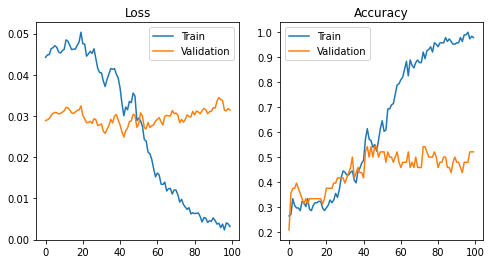

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.55675
	Train loss: 0.04427, Accuracy: 47/189 (24.87%)
	Validation loss: 0.02887, Accuracy: 10/48 (20.83%)
	Test loss: 0.02787, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.51367
	Train loss: 0.04425, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02890, Accuracy: 10/48 (20.83%)
	Test loss: 0.02794, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.42281
	Train loss: 0.04401, Accuracy: 53/189 (28.04%)
	Validation loss: 0.02898, Accuracy: 8/48 (16.67%)
	Test loss: 0.02795, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.46619
	Train loss: 0.04348, Accuracy: 58/189 (30.69%)
	Validation loss: 0.02917, Accuracy: 7/48 (14.58%)
	Test loss: 0.02802, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.39496
	Train loss: 0.04259, Accuracy: 71/189 (37.57%)
	Validation loss: 0.02954, Accuracy: 10/48 (20.83%)
	Test loss: 0.02825,

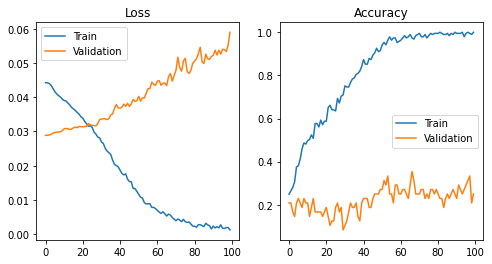

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.49820
	Train loss: 0.04381, Accuracy: 52/189 (27.51%)
	Validation loss: 0.02898, Accuracy: 12/48 (25.00%)
	Test loss: 0.02783, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.46981
	Train loss: 0.04356, Accuracy: 56/189 (29.63%)
	Validation loss: 0.02892, Accuracy: 12/48 (25.00%)
	Test loss: 0.02794, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.41179
	Train loss: 0.04301, Accuracy: 64/189 (33.86%)
	Validation loss: 0.02879, Accuracy: 8/48 (16.67%)
	Test loss: 0.02823, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.39990
	Train loss: 0.04238, Accuracy: 71/189 (37.57%)
	Validation loss: 0.02903, Accuracy: 11/48 (22.92%)
	Test loss: 0.02850, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.37185
	Train loss: 0.04188, Accuracy: 71/189 (37.57%)
	Validation loss: 0.02926, Accuracy: 9/48 (18.75%)
	Test loss: 0.02884,

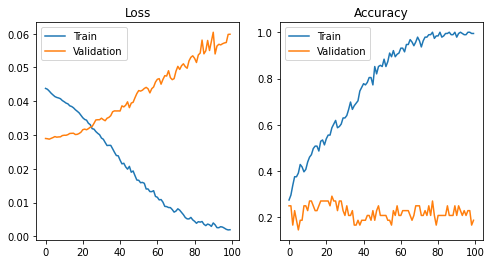

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.38329
	Train loss: 0.04396, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02907, Accuracy: 10/48 (20.83%)
	Test loss: 0.02779, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.37881
	Train loss: 0.04395, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02907, Accuracy: 10/48 (20.83%)
	Test loss: 0.02779, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.37785
	Train loss: 0.04394, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02907, Accuracy: 10/48 (20.83%)
	Test loss: 0.02779, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.37808
	Train loss: 0.04393, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02907, Accuracy: 10/48 (20.83%)
	Test loss: 0.02779, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.37797
	Train loss: 0.04391, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02907, Accuracy: 10/48 (20.83%)
	Test loss: 0.027

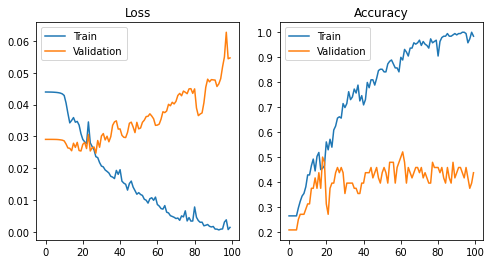

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.42103
	Train loss: 0.04403, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02907, Accuracy: 10/48 (20.83%)
	Test loss: 0.02780, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.39275
	Train loss: 0.04395, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02902, Accuracy: 10/48 (20.83%)
	Test loss: 0.02777, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.37500
	Train loss: 0.04388, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02901, Accuracy: 10/48 (20.83%)
	Test loss: 0.02776, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.37440
	Train loss: 0.04378, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02898, Accuracy: 10/48 (20.83%)
	Test loss: 0.02774, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.38161
	Train loss: 0.04366, Accuracy: 50/189 (26.46%)
	Validation loss: 0.02893, Accuracy: 12/48 (25.00%)
	Test loss: 0.027

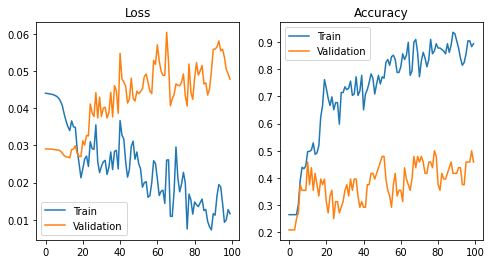

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)